### Dow Jones Industrial Average Trading Strategies


Dow Jones Industrial Average measures the stock performance of 30 large companies listed on the stock exchanges in the United State.It is the most commonly followed indices in U.S stock market. 
In this project, we will attempt to use the Dow Jones to develop a strategy that will yield profitability over time. although Dow Jones is not traded directly, however, we can invest in a portfolio that has constituents of Dow Jones.

We might know little or nothing about Dow Jones however, we can make use of wikipedia to help us in the process of getting the vital components to use in this project.

We will do a little web scrapping to get the ticker symbols to pull the data from the web API needed for the project.

In [22]:
# Importing the neccessary libraries
import numpy as np
import pandas as pd
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing tabular component of dow jones constituents 
pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")

[                                                   0  \
 0  Historical logarithmic graph of the DJIA from ...   
 1                                         Foundation   
 2                                           Operator   
 3                                          Exchanges   
 4                                     Trading symbol   
 5                                       Constituents   
 6                                               Type   
 7                                         Market cap   
 8                                   Weighting method   
 9                                            Website   
 
                                                    1  
 0  Historical logarithmic graph of the DJIA from ...  
 1  February 16, 1885; 135 years ago[1]May 26, 189...  
 2                              S&P Dow Jones Indices  
 3                      New York Stock ExchangeNASDAQ  
 4                                               ^DJI  
 5                                 

In [6]:
# importing the dataset needed for analysis by pulling the 2nd table
const = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]
const

,Company,Exchange,Symbol,Industry,Date added,Notes,"Index weighting(September 1, 2020)"
0,3M,NYSE,NYSE: MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.80%
1,American Express,NYSE,NYSE: AXP,Financial services,1982-08-30,NaN,2.35%
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,2020-08-31,NaN,5.81%
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.87%
4,Boeing,NYSE,NYSE: BA,Aerospace and defense,1987-03-12,NaN,4.04%
5,Caterpillar Inc.,NYSE,NYSE: CAT,Construction and Mining,1991-05-06,NaN,3.30%
6,Chevron Corporation,NYSE,NYSE: CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,1.97%
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.97%
8,The Coca-Cola Company,NYSE,NYSE: KO,Food industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.14%
9,Dow Inc.,NYSE,NYSE: DOW,Chemical industry,2019-04-02,NaN,1.06%


In [15]:
# Dropping unwanted columns 
const =  const.iloc[:, :4].copy()
const.head(10)

,Company,Exchange,Symbol,Industry
0,3M,NYSE,NYSE: MMM,Conglomerate
1,American Express,NYSE,NYSE: AXP,Financial services
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry
3,Apple Inc.,NASDAQ,AAPL,Information technology
4,Boeing,NYSE,NYSE: BA,Aerospace and defense
5,Caterpillar Inc.,NYSE,NYSE: CAT,Construction and Mining
6,Chevron Corporation,NYSE,NYSE: CVX,Petroleum industry
7,Cisco Systems,NASDAQ,CSCO,Information technology
8,The Coca-Cola Company,NYSE,NYSE: KO,Food industry
9,Dow Inc.,NYSE,NYSE: DOW,Chemical industry


In [16]:
# Rename the columns for easier manipulation
#const.rename(columns = {"Date added":"Date_Added"}, inplace = True)
#const.head()

In [17]:
# Putting a time stamp on date
#const.Date_Added = pd.to_datetime(const.Date_Added)

In [18]:
# Checking the data info
const.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
Company     30 non-null object
Exchange    30 non-null object
Symbol      30 non-null object
Industry    30 non-null object
dtypes: object(4)
memory usage: 1.1+ KB


In [19]:
const

,Company,Exchange,Symbol,Industry
0,3M,NYSE,NYSE: MMM,Conglomerate
1,American Express,NYSE,NYSE: AXP,Financial services
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry
3,Apple Inc.,NASDAQ,AAPL,Information technology
4,Boeing,NYSE,NYSE: BA,Aerospace and defense
5,Caterpillar Inc.,NYSE,NYSE: CAT,Construction and Mining
6,Chevron Corporation,NYSE,NYSE: CVX,Petroleum industry
7,Cisco Systems,NASDAQ,CSCO,Information technology
8,The Coca-Cola Company,NYSE,NYSE: KO,Food industry
9,Dow Inc.,NYSE,NYSE: DOW,Chemical industry


Even thou the data looks clean, the data is not really clean because the strings are originally from html code the unicode needs to be encoded and normalized.

In [24]:
# example of unicode
const.Symbol[5]


'NYSE:\xa0CAT'

In [30]:
# We will create a lambda function to normalize the unicode
const.Symbol.apply(lambda x: unicodedata.normalize("NFKD", x))

0     NYSE: MMM
1     NYSE: AXP
2          AMGN
3          AAPL
4      NYSE: BA
5     NYSE: CAT
6     NYSE: CVX
7          CSCO
8      NYSE: KO
9     NYSE: DOW
10     NYSE: GS
11     NYSE: HD
12    NYSE: HON
13    NYSE: IBM
14         INTC
15    NYSE: JNJ
16    NYSE: JPM
17    NYSE: MCD
18    NYSE: MRK
19         MSFT
20    NYSE: NKE
21     NYSE: PG
22    NYSE: CRM
23    NYSE: TRV
24    NYSE: UNH
25     NYSE: VZ
26      NYSE: V
27          WBA
28    NYSE: WMT
29    NYSE: DIS
Name: Symbol, dtype: object

In [31]:
# Using the lambda fuction to normalize
const.Symbol = const.Symbol.apply(lambda x: unicodedata.normalize("NFKD", x))

In [32]:
# example of normalized unicode string
const.Symbol[5]

'NYSE: CAT'

In [36]:
# We will use the split method to obtain the tickers
const.Symbol.str.split(": ").apply(lambda x: x[-1])

0      MMM
1      AXP
2     AMGN
3     AAPL
4       BA
5      CAT
6      CVX
7     CSCO
8       KO
9      DOW
10      GS
11      HD
12     HON
13     IBM
14    INTC
15     JNJ
16     JPM
17     MCD
18     MRK
19    MSFT
20     NKE
21      PG
22     CRM
23     TRV
24     UNH
25      VZ
26       V
27     WBA
28     WMT
29     DIS
Name: Symbol, dtype: object

In [37]:
# Adding the tickers to our dataset
const["Ticker"] = const.Symbol.str.split(": ").apply(lambda x: x[-1])

In [35]:
const

,Company,Exchange,Symbol,Industry,Ticker
0,3M,NYSE,NYSE: MMM,Conglomerate,MMM
1,American Express,NYSE,NYSE: AXP,Financial services,AXP
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,AMGN
3,Apple Inc.,NASDAQ,AAPL,Information technology,AAPL
4,Boeing,NYSE,NYSE: BA,Aerospace and defense,BA
5,Caterpillar Inc.,NYSE,NYSE: CAT,Construction and Mining,CAT
6,Chevron Corporation,NYSE,NYSE: CVX,Petroleum industry,CVX
7,Cisco Systems,NASDAQ,CSCO,Information technology,CSCO
8,The Coca-Cola Company,NYSE,NYSE: KO,Food industry,KO
9,Dow Inc.,NYSE,NYSE: DOW,Chemical industry,DOW


In [39]:
# Creating a list of the tickers
ticker_list = const.Ticker.to_list()
ticker_list

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT',
 'DIS']

In [41]:
# we will install yahoo finance 
#!pip install yfinance

In [42]:
import yfinance as yf

In [43]:
#Downloading the Dow Jones Industrial Average date
yf.download("DJI")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-01-02,809.200012,809.200012,809.200012,809.200012,809.200012,0
1970-01-05,811.309998,811.309998,811.309998,811.309998,811.309998,0
1970-01-06,803.659973,803.659973,803.659973,803.659973,803.659973,0
1970-01-07,801.809998,801.809998,801.809998,801.809998,801.809998,0
1970-01-08,802.070007,802.070007,802.070007,802.070007,802.070007,0
...,...,...,...,...,...,...
2020-09-24,26815.400391,26815.400391,26815.400391,26815.400391,26815.400391,0
2020-09-29,27452.699219,27452.699219,27452.699219,27452.699219,27452.699219,0
2020-09-30,27781.699219,27781.699219,27781.699219,27781.699219,27781.699219,0


We want data from 2010-01-01 to 2020-10-05

In [46]:
# downloading data
dji = yf.download("^DJI",start = "2010-01-01", end = "2020-10-05")
dji

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000
...,...,...,...,...,...,...
2020-09-28,27362.140625,27722.599609,27362.140625,27584.060547,27584.060547,401860000
2020-09-29,27560.240234,27605.599609,27338.089844,27452.660156,27452.660156,303820000
2020-09-30,27514.640625,28026.330078,27511.060547,27781.699219,27781.699219,452550000


In [47]:
# checking the data info
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2010-01-04 to 2020-10-02
Data columns (total 6 columns):
Open         2707 non-null float64
High         2707 non-null float64
Low          2707 non-null float64
Close        2707 non-null float64
Adj Close    2707 non-null float64
Volume       2707 non-null int64
dtypes: float64(5), int64(1)
memory usage: 148.0 KB


In [48]:
# ticker list 
ticker_list

['MMM',
 'AXP',
 'AMGN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WBA',
 'WMT',
 'DIS']

In [49]:
# pulling the data from yahoo finance for our ticker list
prices = yf.download(ticker_list, start = "2010-01-01", end = "2020-10-01")

[*********************100%***********************]  30 of 30 completed


In [50]:
prices

Adj Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2010-01-04    6.604801   46.327202   34.774685   43.441975   42.634403   
2010-01-05    6.616219   45.925884   34.698196   44.864773   43.144135   
2010-01-06    6.510980   45.580757   35.259079   46.225727   43.275200   
2010-01-07    6.498945   45.163395   35.830952   48.097031   43.449959   
2010-01-08    6.542150   45.564713   35.805344   47.633064   43.937828   
...                ...         ...         ...         ...         ...   
2020-09-25  112.279999  243.820007   96.260002  156.029999  145.910004   
2020-09-28  114.959999  247.029999   98.820000  166.080002  147.679993   
2020-09-29  114.089996  248.300003   97.750000  163.600006  147.410004   
2020-09-30  115.809998  254.160004  100.250000  165.259995  149.149994   
2020-10-01         NaN         NaN         NaN         NaN         NaN   

                                                                     ...  \
                   CRM       CSCO        CVX         DIS        DOW  ...   
Date                                                                 ...   
2010-01-04   18.705000  18.613705  52.293617   27.933924        NaN  ...   
2010-01-05   18.625000  18.530785  52.664024   27.864237        NaN  ...   
2010-01-06   18.592501  18.410154  52.670624   27.716166        NaN  ...   
2010-01-07   18.510000  18.493084  52.472206   27.724878        NaN  ...   
2010-01-08   18.537500  18.591087  52.564808   27.768419        NaN  ...   
...                ...        ...        ...         ...        ...  ...   
2020-09-25  242.740005  38.098591  71.830002  124.000000  46.040001  ...   
2020-09-28  246.669998  38.772377  73.930000  125.989998  47.480000  ...   
2020-09-29  247.449997  38.703018  71.900002  125.400002  46.570000  ...   
2020-09-30  251.320007  39.029999  72.000000  124.080002  47.049999  ...   
2020-10-01         NaN        NaN        NaN         NaN        NaN  ...   

                Volume                                                 \
                   MRK        MSFT         NKE         PG         TRV   
Date                                                                    
2010-01-04  13896500.0  38409100.0  11972400.0  9190800.0   3716000.0   
2010-01-05  14744800.0  49749600.0   6275200.0  8649400.0   5941900.0   
2010-01-06  15239900.0  58182400.0  13399200.0  9908400.0  10124500.0   
2010-01-07  11916600.0  50559700.0   7187600.0  8972800.0   4901600.0   
2010-01-08  10767100.0  51197400.0   7249600.0  8464600.0   3933100.0   
...                ...         ...         ...        ...         ...   
2020-09-25   6614600.0  29437300.0   9182800.0  4969900.0   1714100.0   
2020-09-28   5843200.0  32004900.0   7525000.0  5810800.0   1555900.0   
2020-09-29   6433600.0  24221900.0   7796400.0  4492100.0   1306500.0   
2020-09-30  11062600.0  33780700.0   8698000.0  8727800.0   1595800.0   
2020-10-01         NaN         NaN         NaN        NaN         NaN   

                                                                        
                   UNH           V          VZ         WBA         WMT  
Date                                                                    
2010-01-04  12199500.0  20180000.0  16176600.0   8171000.0  20753100.0  
2010-01-05  11180700.0  25833600.0  23722900.0  10843200.0  15648400.0  
2010-01-06   9761100.0  16254000.0  37506400.0   8945400.0  12517200.0  
2010-01-07  11789800.0  27841200.0  25508200.0   5040700.0  10662700.0  
2010-01-08   7228700.0  11907200.0  20658300.0   6139800.0  11363200.0  
...                ...         ...         ...         ...         ...  
2020-09-25   2455800.0   5496100.0  10676300.0   5955400.0   7539600.0  
2020-09-28   2575700.0   5565300.0  11910500.0   5901600.0   7065700.0  
2020-09-29   1797800.0   5513500.0  10005900.0   5079100.0   9234300.0  
2020-09-30  

In [51]:
# Checking the info for our new data
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2010-01-04 to 2020-10-01
Columns: 180 entries, (Adj Close, AAPL) to (Volume, WMT)
dtypes: float64(180)
memory usage: 3.7 MB


In [52]:
# we are interested in only the colsing price
prices = prices.loc[:, "Close"].copy()

In [53]:
prices

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.643214,57.720001,40.919998,56.180000,58.549999,18.705000,24.690001,79.059998,32.070000,NaN,...,37.009998,30.950001,16.337500,61.119999,49.810001,31.530001,22.035000,31.212946,37.299999,54.230000
2010-01-05,7.656428,57.220001,40.830002,58.020000,59.250000,18.625000,24.580000,79.620003,31.990000,NaN,...,37.160000,30.959999,16.402500,61.139999,48.630001,31.480000,21.782499,31.269218,37.000000,53.689999
2010-01-06,7.534643,56.790001,41.490002,59.779999,59.430000,18.592501,24.420000,79.629997,31.820000,NaN,...,37.660000,30.770000,16.302500,60.849998,47.939999,31.790001,21.490000,29.937416,36.720001,53.570000
2010-01-07,7.520714,56.270000,41.980000,62.200001,59.669998,18.510000,24.530001,79.330002,31.830000,NaN,...,37.720001,30.450001,16.462500,60.520000,48.630001,33.009998,21.690001,29.759218,36.939999,53.599998
2010-01-08,7.570714,56.770000,41.950001,61.599998,60.340000,18.537500,24.660000,79.470001,31.879999,NaN,...,37.700001,30.660000,16.430000,60.439999,48.560001,32.700001,21.750000,29.777975,36.990002,53.330002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-25,112.279999,243.820007,96.260002,156.029999,145.910004,242.740005,38.450001,71.830002,124.000000,46.040001,...,82.930000,207.820007,124.230003,137.619995,108.110001,302.500000,197.250000,59.389999,35.430000,137.270004
2020-09-28,114.959999,247.029999,98.820000,166.080002,147.679993,246.669998,39.130001,73.930000,125.989998,47.480000,...,82.760002,209.440002,124.320000,138.009995,110.220001,303.230011,200.320007,59.360001,36.070000,137.250000
2020-09-29,114.089996,248.300003,97.750000,163.600006,147.410004,247.449997,39.060001,71.900002,125.400002,46.570000,...,81.900002,207.259995,126.349998,137.259995,107.440002,304.149994,199.440002,59.240002,35.380001,137.139999


In [54]:
# checking the info
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2010-01-04 to 2020-10-01
Data columns (total 30 columns):
AAPL    2705 non-null float64
AMGN    2705 non-null float64
AXP     2705 non-null float64
BA      2705 non-null float64
CAT     2705 non-null float64
CRM     2705 non-null float64
CSCO    2705 non-null float64
CVX     2705 non-null float64
DIS     2705 non-null float64
DOW     388 non-null float64
GS      2705 non-null float64
HD      2705 non-null float64
HON     2705 non-null float64
IBM     2705 non-null float64
INTC    2705 non-null float64
JNJ     2705 non-null float64
JPM     2705 non-null float64
KO      2705 non-null float64
MCD     2705 non-null float64
MMM     2705 non-null float64
MRK     2705 non-null float64
MSFT    2705 non-null float64
NKE     2705 non-null float64
PG      2705 non-null float64
TRV     2705 non-null float64
UNH     2705 non-null float64
V       2705 non-null float64
VZ      2705 non-null float64
WBA     2705 non-null float64
WMT   

Back testing Investment strategy

In [55]:
# checking data
dji.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10430.690430,10604.969727,10430.690430,10583.959961,10583.959961,179780000
2010-01-05,10584.559570,10584.559570,10522.519531,10572.019531,10572.019531,188540000
2010-01-06,10564.719727,10594.990234,10546.549805,10573.679688,10573.679688,186040000
2010-01-07,10571.110352,10612.370117,10505.209961,10606.860352,10606.860352,217390000
2010-01-08,10606.400391,10619.400391,10554.330078,10618.190430,10618.190430,172710000


In [56]:
#checking data info
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2707 entries, 2010-01-04 to 2020-10-02
Data columns (total 6 columns):
Open         2707 non-null float64
High         2707 non-null float64
Low          2707 non-null float64
Close        2707 non-null float64
Adj Close    2707 non-null float64
Volume       2707 non-null int64
dtypes: float64(5), int64(1)
memory usage: 148.0 KB


In [57]:
# changing data to dataframe for easier fuctionality
df_dji = dji["Close"].to_frame()

In [58]:
df_dji

,Close
Date,
2010-01-04,10583.959961
2010-01-05,10572.019531
2010-01-06,10573.679688
2010-01-07,10606.860352
2010-01-08,10618.190430
...,...
2020-09-28,27584.060547
2020-09-29,27452.660156
2020-09-30,27781.699219


#### Data Visuals and Returns

In [61]:
# checking data summary
df_dji.describe()

,Close
count,2707.000000
mean,18210.395319
std,5462.309676
min,9686.480469
25%,13136.969727
50%,17492.929688
75%,23585.804688
max,29551.419922


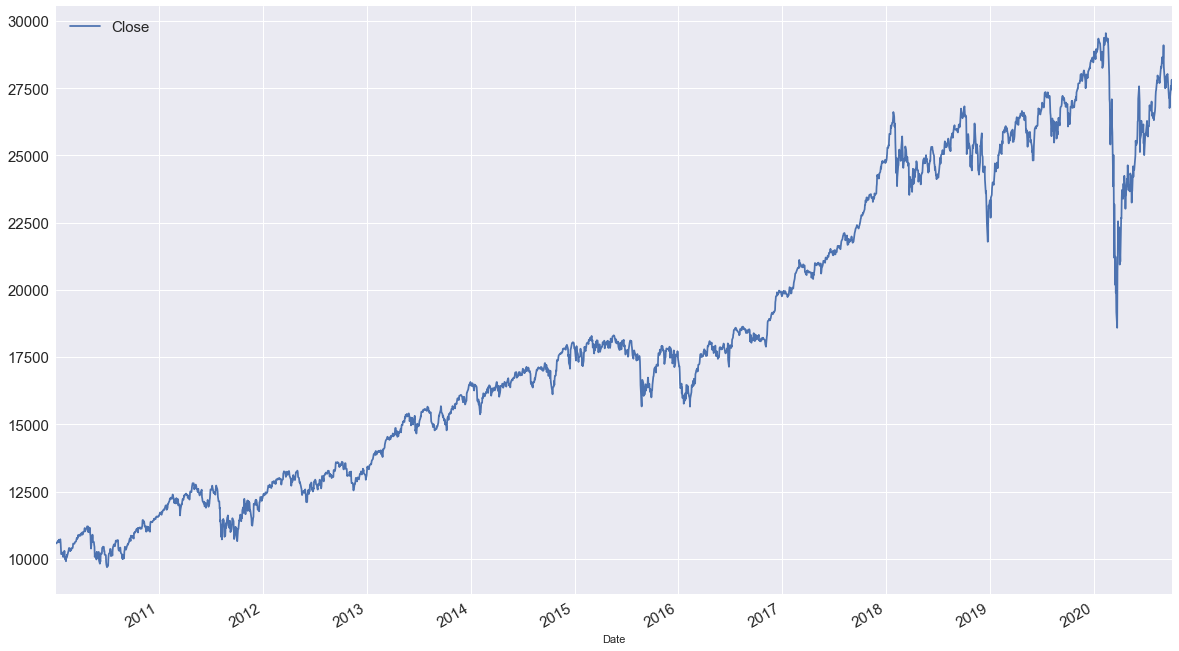

In [63]:
# plotting the data
plt.style.use("seaborn")
df_dji.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [65]:
# calculating the return 
df_dji["Return"] = df_dji.pct_change()
df_dji

,Close,Return
Date,,
2010-01-04,10583.959961,NaN
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
...,...,...
2020-09-28,27584.060547,0.015092
2020-09-29,27452.660156,-0.004764
2020-09-30,27781.699219,0.011986


In [ ]:
df_dji